## 07. 데이터 정제
- 현장에서 만들어진 데이터는 오류를 포함하고 잇기 떄문에 분석하기 전에 수정이 필요
1. 결측치 (빠진 데이터)
2. 이상치 (이상한 데이터)

## 7-1 결측치(빠진 데이터 찾아 정제)

> Lab 1 : 결측치 찾기
- 결측치 만들기
- 결측치 확인하기


In [4]:
import numpy as np
import pandas as pd

In [6]:
df = pd.DataFrame( {'sex' : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]} )
                
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [7]:
# NaN 값으로 연산된 결과 값도 NaN
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [9]:
# 결측치 확인하기
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [18]:
# 결측치 개수
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [21]:
# 컬럼(변수) sex의 결측치 개수
pd.isna(df)['sex'].sum()

1

> Lab 2 : 결측치 제거
- 결측치 있는 행 제거하기
- 여러 변수(컬럼)에 결츠치 없는 데이터 추출하기
- 결측치가 하난라도 있으면 제거하기

In [22]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [23]:
# score 변수에서 결측치 제거
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [24]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [25]:
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [26]:
# 변수 sex, score의 결측치 제거하기
df_nomiss = df.dropna(subset= ['sex', 'score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [27]:
# 결측치가 하나라도 있으면 모두 제거하기
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


### 생각해 보기 - 결측치를 모두 제거해 버리면 ??
1. 분석에 필요한 행까지 모두 제거될 수 있음
2. 예를 들어, (성별, 소득, 지역) 세 변수로 구성된 데이터에서 '성별에 따른 소득 격차'를 알아보는 경우,  지역의 결측치를 제거할 필요가 없음

> Lab 3 : 결측치 제거하기
1. 평균 값으로 대체하기
- exam.csv 파일 불러우기
- exam 데이터에서 math의 일부 데이터를 결측치(np.nan)로 대체하기
- exam의 결측치를 math의 평균 값을 구하여 평균값으로 대체하기

In [14]:
exam = pd.read_csv('exam.csv')

In [17]:
# 인덱스 값 2, 7, 14에 해당 하는 행의 math 컬럼 값을 NaN 값으로 변경
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [19]:
# math 편균값 구하기
exam['math'].mean()

55.23529411764706

In [20]:
# 결측치에 평균값 대체하기
exam['math'] = exam['math'].fillna(55)

In [21]:
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [22]:
# 결측치 확인
exam['math'].isna().sum()

0

## Lab 4 : 혼자서 해보기 (mpg 데이터 분석)
- mpg 데이터에 결측치를 만들고, 데이터를 분석해 보기
- 인데스 값 [64, 123, 130, 152, 211]의 고속도록 연비(hwy) 값을 결측치로 만들기

In [23]:
mpg = pd.read_csv('mpg.csv')

In [24]:
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

In [26]:
mpg.iloc[60:65]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17.0,r,suv
61,dodge,durango 4wd,5.2,1999,8,auto(l4),4,11,16.0,r,suv
62,dodge,durango 4wd,5.7,2008,8,auto(l5),4,13,18.0,r,suv
63,dodge,durango 4wd,5.9,1999,8,auto(l4),4,11,15.0,r,suv
64,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,NaN,r,pickup


> Q1 : 구동 방식(drv)별로 고속도로 연비(hwy) 평균일 비교하려고함
- drv와 hwy 변수에 결측치가 몇개 있는지 확인하기

In [28]:
mpg[['drv', 'hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

Q2 : df.dropna()를 이용하여 hwy 변수의 결측치를 제거하고, 어떤 구동 방식의 hwy 평균 연비가 높은지 알아보시오. 하나의 pandas 구문으로 작성해 보시오

In [30]:
mpg.dropna?

In [31]:
mpg.dropna(subset= ['drv', 'hwy'])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [34]:
mpg.dropna(subset= ['drv', 'hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


## 7-2 이상치 정제하기 (이상한 데이터 찾아 정제)
- 이상치 : 정상 범위에서 크게 벋어난 값
- (예) 몸무게 230kg

## Lab 1 : 이상치 제거하기 - 존재할 수 없는 값
- 이상 값을 제거하고 성별 score 평균 구하기
    1. 이상치를 갖는 데이터 만들기
    1. 이상치 확인하기
    1. 결측 처리하기
    1. 성별 score 평균 구하기

In [37]:
# 이상치를 갖는 데이터 만들기
# sex (남자 - 1, 여자 - 2)
# score (1점 ~ 5점) 5점 척도로 분류
# 이상치 : sex - 3, score - 6
df = pd.DataFrame( {'sex'  : [1, 2, 1, 3, 2, 1],
                    'score' :[5, 4, 3, 4, 2, 6]
                   })
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [42]:
# 이상치 확인하기
# sex 값의  집단별 빈도수 확인 - 3값이 존재
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [43]:
# 이상치 확인하기
# score 값의  집단별 빈도수 확인 - 6값이 존재
df['score'].value_counts().sort_index() 

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [44]:
# 이상 값을 찾아 결측치 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [45]:
# 이상 값을 찾아 결측치 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [46]:
df.groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


## Lab 2 : 이상치 제거하기 - 극단적인 값
- 값의 정상범위를 정하고, 정상 범위를 벋어난 값을 제거하기
- 값의 정상 범위를 정할 때 통계적 기준을 적용할 수 있음
    1. 상자(수염) 그림으로 극단치 기준 정하기

#### 1. 상자 그림 살펴보기
| 상자 그림        |    값           |     설명                     |
| ---              | ----            | ------                       |
| 상자 아래 세로선 | 아랫 수염       | 하위 0 ~ 25% 내 해당하는 값  |
| 상자 밑면        | 1사분위수(Q1)   | 하위 0 ~ 25% 내 해당하는 값  |
| 상자 내 굵은 선  | 2사분위수(Q2)   | 하위 50% 내 해당하는 값  |
| 상자 윗면        | 3사분위수(Q3)   | 하위 75% 내 해당하는 값  |
| 상자 위 세로선   | 윗 수염         | 하위 75 ~ 100% 내 해당하는 값  |
| 상자 밖 가로선   | 극단치 경계     | Q1, Q3 밖 1.5 IQR 내 최대값  |
| 상자 밖 점 표식  | 극단치          | Q1, Q3 밖 1.5 IQR 을 벋어난 값  |

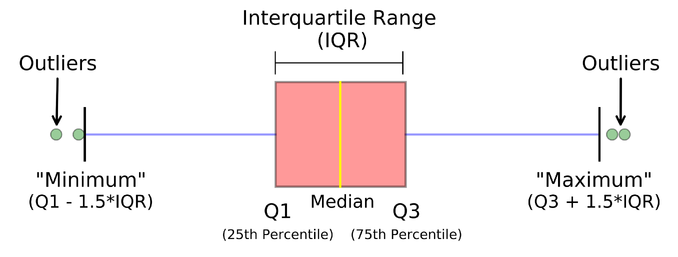

In [48]:
mpg = pd.read_csv('mpg.csv')

In [49]:
import seaborn as sns

<AxesSubplot:ylabel='hwy'>

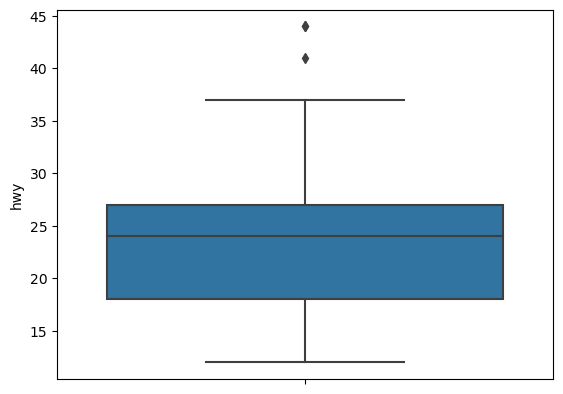

In [51]:
sns.boxplot(data = mpg, y = 'hwy')

#### 2. 극단치 기준값 구하기

> 1사분위수, 3사분위수 구하기

In [54]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [56]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

> IQR 구하기

In [57]:
iqr = pct75 - pct25
iqr

9.0

> 하한, 상한 구하기

In [58]:
pct25 - 1.5 * iqr

4.5

In [59]:
pct75 + 1.5 * iqr

40.5

#### 3. 극단치를 결측 처리하기
- hwy 값이 4.5 ~ 40.5를 벋어나면 결측치 처리
- (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr)

In [61]:
# 극단치를 결측 처리함
# 주의 : np.where()의 각 조건을 괄호로 감싸주어야 함
mpg['hwy'] = np.where( (mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                        np.nan, mpg['hwy']
                     )

In [63]:
# 결측 처리된 값의 수 확인
mpg['hwy'].isna().sum()

3

#### 4. 결측치를 제외하고 데이터 분석
- 구동방식(drv)에 따라 고속도로 연비(hwy)가 어떻게 달라지는지 확인

In [65]:
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


## Lab 2 : 혼자서 해보기
1. mpg 데이터에서 구동방식(drv)별 도시 연비(cty)를 분석해 봅시다.
1. mpg 데이터에 이상값과 극단값을 할당합니다.

- (drv 이상치 할당) mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'
- (cty 이상치 할당) mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]


> mpg 데이터에 이상치 할당

In [66]:
mpg = pd.read_csv('mpg.csv')

In [71]:
# drv에는 4(사륜), f(전륜), r(후륜)의 값만 존재함
#  k는 허용하지 않는 이상치
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

In [72]:
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

Q1 : drv에 이상치가 있는지 확인

In [94]:
# k 값이 4개 존재하는 것을 확인
mpg['drv'].value_counts()

f    106
4    100
r     24
k      4
Name: drv, dtype: int64

In [96]:
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)

In [97]:
mpg['drv'].value_counts()

f    106
4    100
r     24
Name: drv, dtype: int64

> Q2 : 상자 그림으로 cty에 이상치가 있는지 확인
- (pct25 - 1.5 * iqr) ~ (pct75 + 1.5 * iqr) 범위 밖에 극단 값이 있는지 확인

<AxesSubplot:ylabel='cty'>

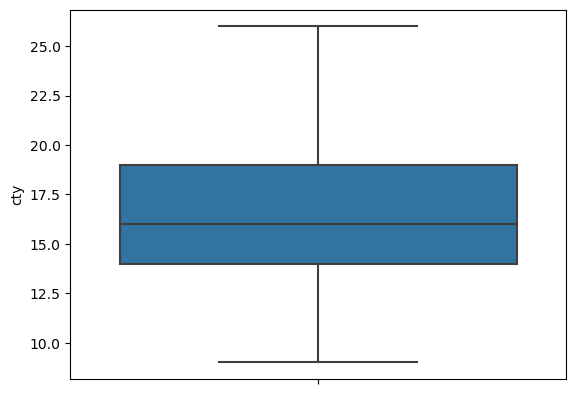

In [98]:
sns.boxplot(data=mpg, y='cty')

In [99]:
pct25 = mpg['cty'].quantile(0.25)
pct25

14.0

In [100]:
pct75 = mpg['cty'].quantile(0.75)
pct75

19.0

In [101]:
iqr = pct75 - pct25
iqr

5.0

In [102]:
pct25 - 1.5 * iqr

6.5

In [103]:
pct75 + 1.5 * iqr

26.5

In [104]:
mpg['cty'] = np.where( (mpg['cty'] < 6.5) | (mpg['cty'] > 26.5),
                        np.nan, mpg['cty'])

<AxesSubplot:ylabel='cty'>

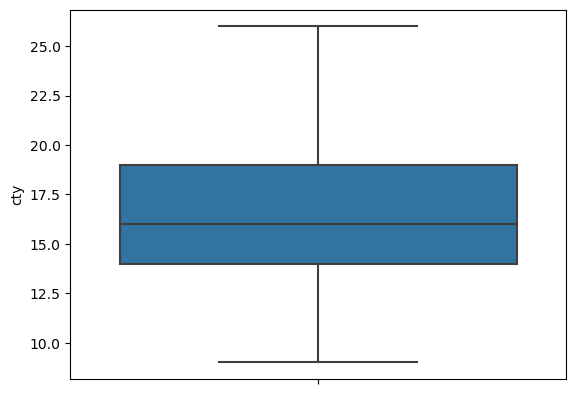

In [105]:
sns.boxplot(data=mpg, y='cty')

> Q3 : 구동방식(drv)별로 도시연비(cty) 평균이 어떻게 다른지 확인하기 

In [106]:
mpg.dropna(subset = ['drv', 'cty']) \
   .groupby('drv')\
   .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
